### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Reading Data

In [2]:
# load dataset
url = "./new_Base_CDM_balanced_V2.csv"
dataset = pd.read_csv(url)
columns = [[dataset[str(c)][0],c ]for c in dataset.columns]

dataset.drop(index=dataset.index[0], 
        axis=0, 
        inplace=True)
cols =pd.DataFrame(columns)
cols.transpose()

,0,1,2,3,4,5,6,7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,Y,X1,X2,X3,X4,X5,X6,X7


In [3]:
dict(zip(cols[0], cols[1]))

{'Display': 'Y',
 'cor_sales_in_vol': 'X1',
 'cor_sales_in_val': 'X2',
 'CA_mag': 'X3',
 'value': 'X4',
 'ENSEIGNE': 'X5',
 'VenteConv': 'X6',
 'Feature': 'X7'}

In [4]:
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [5]:
#Renaming variables 
dataset.rename(columns = dict(zip(cols[1], cols[0])) , inplace = True)

In [6]:
pd.value_counts(dataset["Display"])
# No_Displ : 13000
# Displ : 12782
# =========> balanced data

No_Displ    13000
Displ       12782
Name: Display, dtype: int64

In [7]:
pd.value_counts(dataset["Feature"])

No_Feat    19495
Feat        6287
Name: Feature, dtype: int64

In [8]:
dataset.describe()

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
count,25782,25782,25782,25782,25782,25782,25782,25782
unique,2,363,8957,323,84,19,1589,2
top,No_Displ,1,7.5,109503,40,CARREFOUR,40,No_Feat
freq,13000,5827,64,255,3314,4629,828,19495


In [9]:
#Checking Missing values
dataset.isnull().sum()

Display             0
cor_sales_in_vol    0
cor_sales_in_val    0
CA_mag              0
value               0
ENSEIGNE            0
VenteConv           0
Feature             0
dtype: int64

### Test d'indépendance de khi-2

In [10]:
#### Test de chi-deux entre la variable 'Display' et 'ENSEIGNE' 
from scipy.stats import chi2_contingency as chi2_contingency

contingence = dataset[["Display","ENSEIGNE"]].pivot_table(index="Display",columns="ENSEIGNE",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est très inférieur à 0.05, on considère donc qu'il existe un lien entre la variable 'Display'
# et la varible 'ENSEIGNE'  : il y a dépendance
print(pval)



1.1069799512990182e-154


In [11]:
#### Test de chi-deux entre la variable 'Display' et 'Feature' 

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
contingence = dataset[["Display","Feature"]].pivot_table(index="Display",columns="Feature",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est égale à 0 , on considère donc qu'il existe un lien entre la variable 'Display'
# et la varible 'Feature'  : il y a dépendance
print(pval)


0.0


In [12]:
quantitative_variables = ['cor_sales_in_vol', 'cor_sales_in_val', 'CA_mag', 'value', 'VenteConv']
for column_name in quantitative_variables :
    dataset[column_name]=dataset[column_name].astype(float)

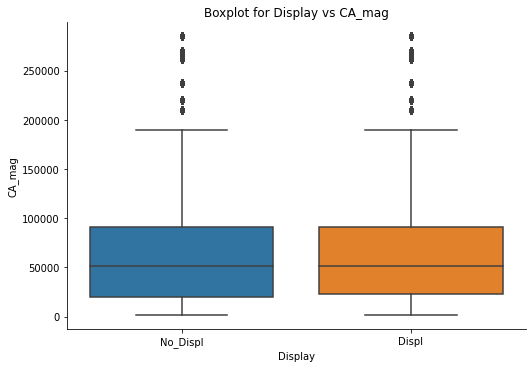

In [13]:
sns.catplot(x="Display", y="CA_mag", data=dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs CA_mag")
plt.show()

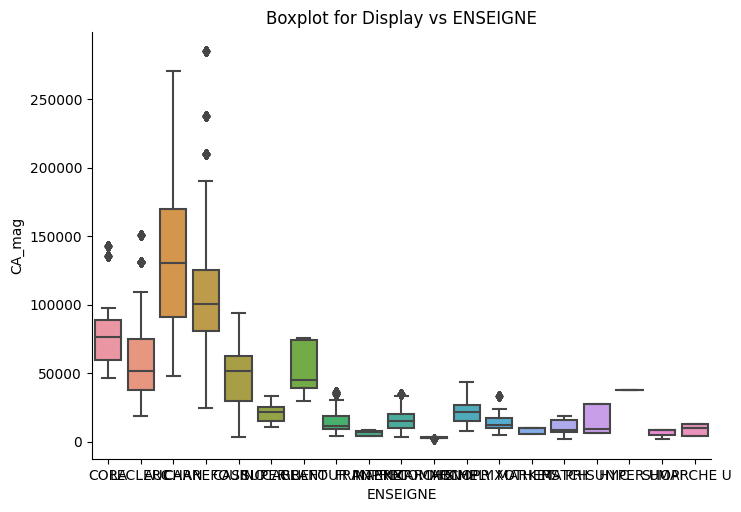

In [14]:
sns.catplot(x="ENSEIGNE", y="CA_mag", data=dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs ENSEIGNE")
plt.show()

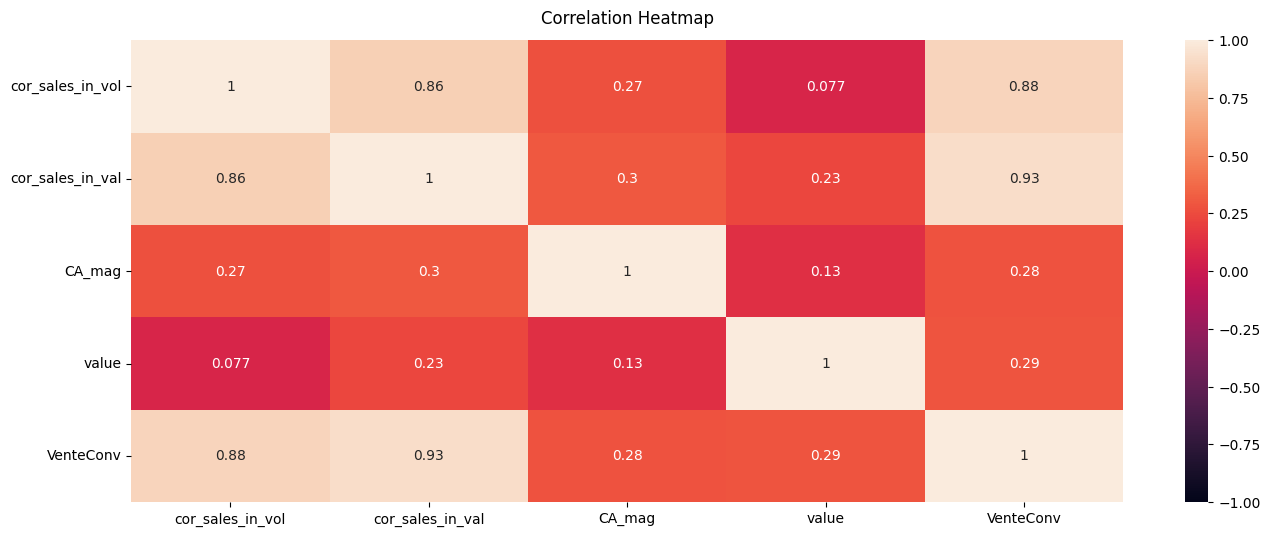

In [15]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataset[quantitative_variables].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

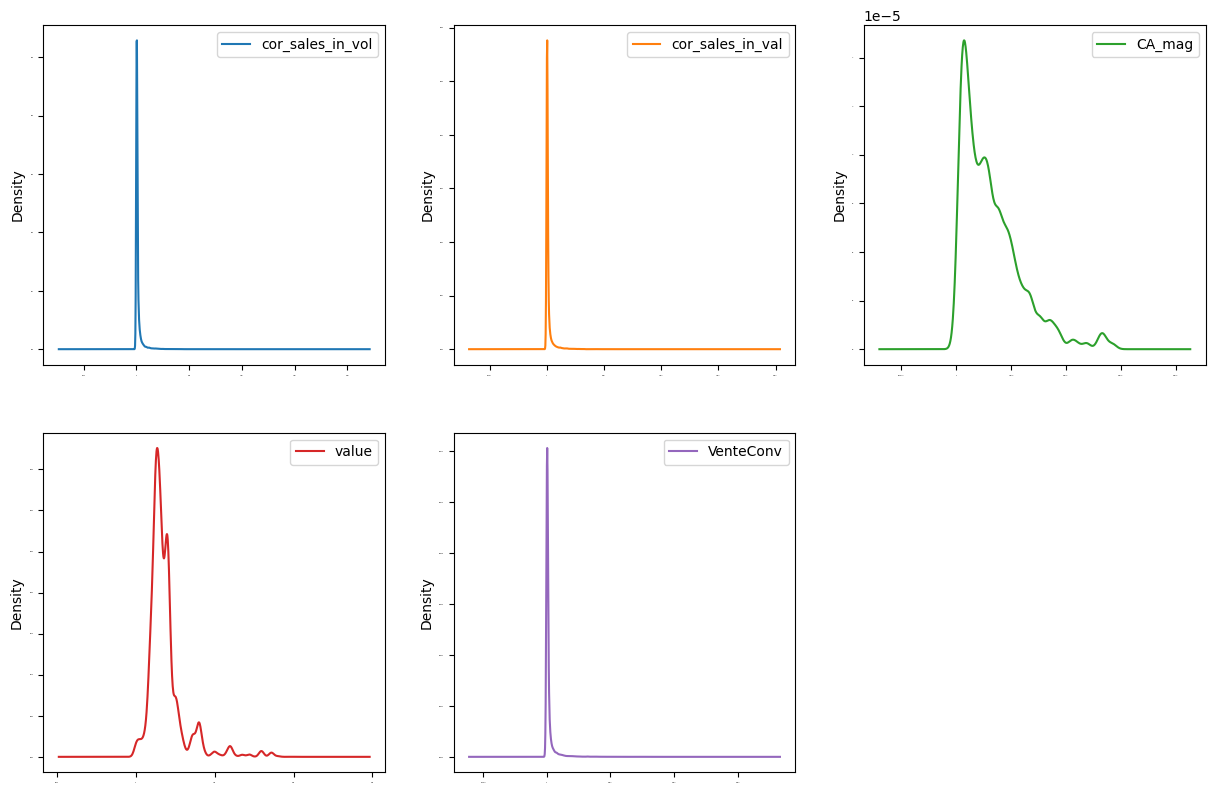

In [16]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

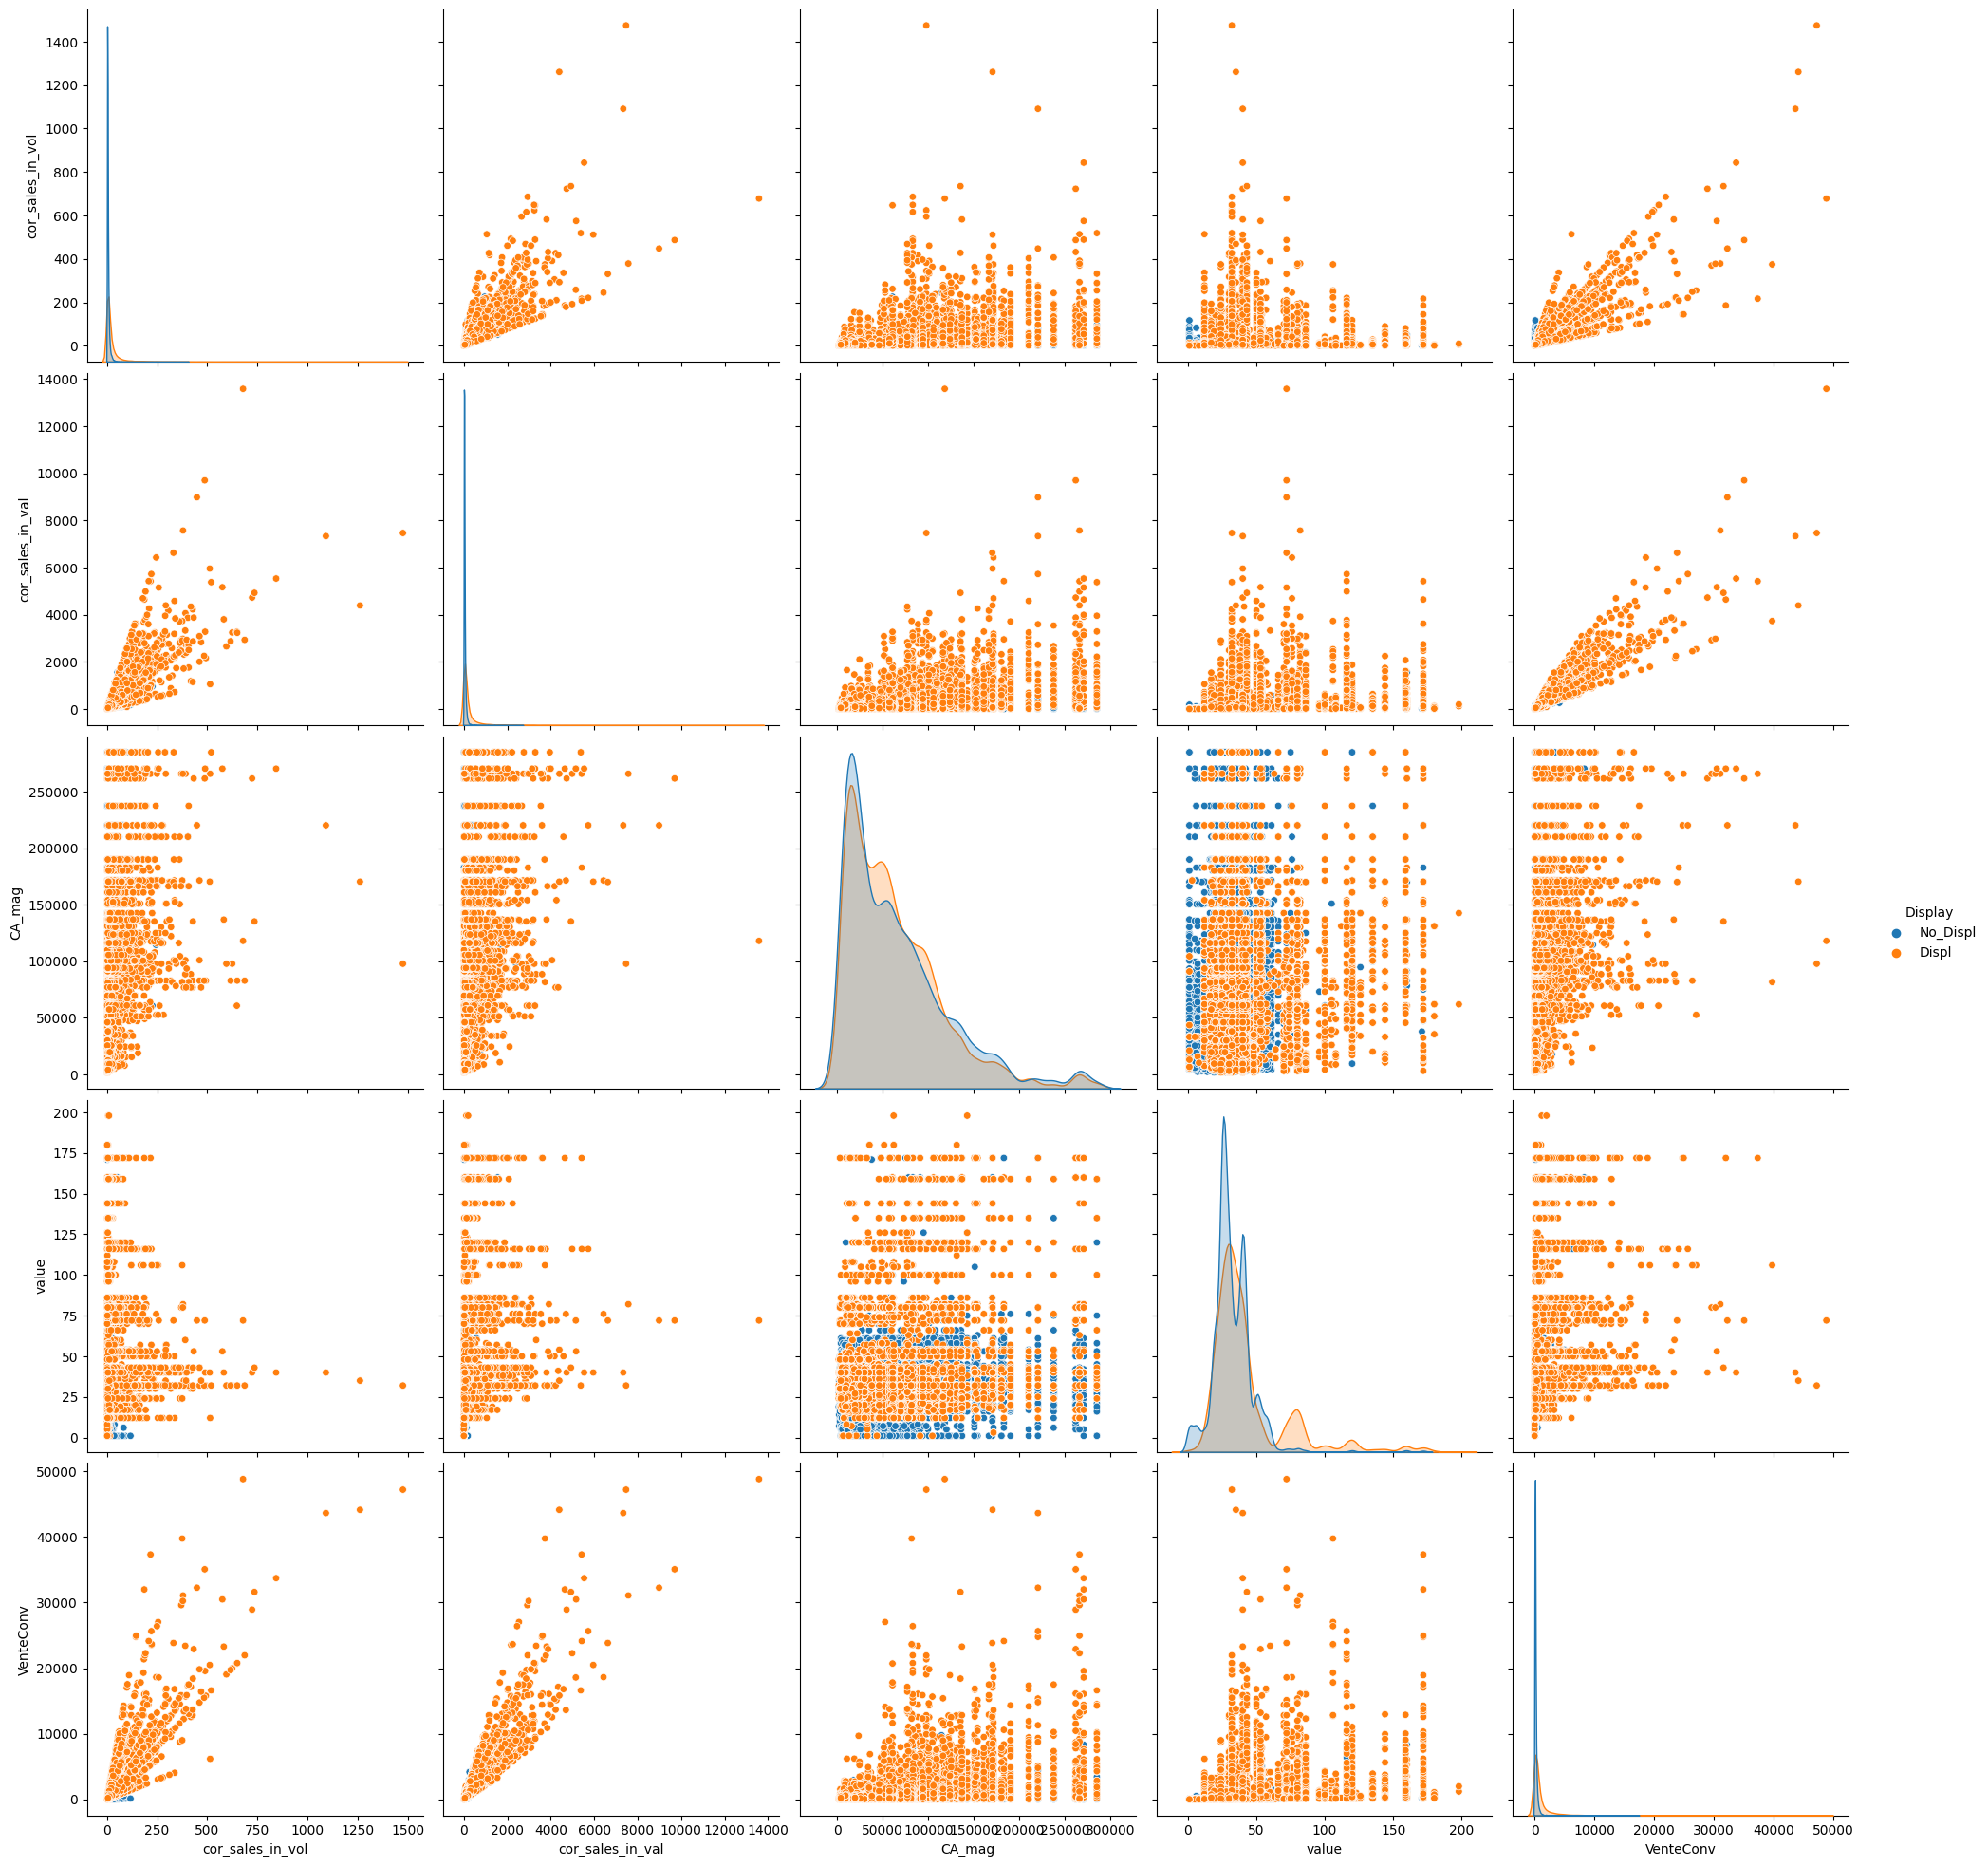

In [17]:
sns.pairplot(dataset, kind="scatter", hue="Display", plot_kws=dict(s=30, edgecolor="white", linewidth=0.5),height=4)
plt.show()

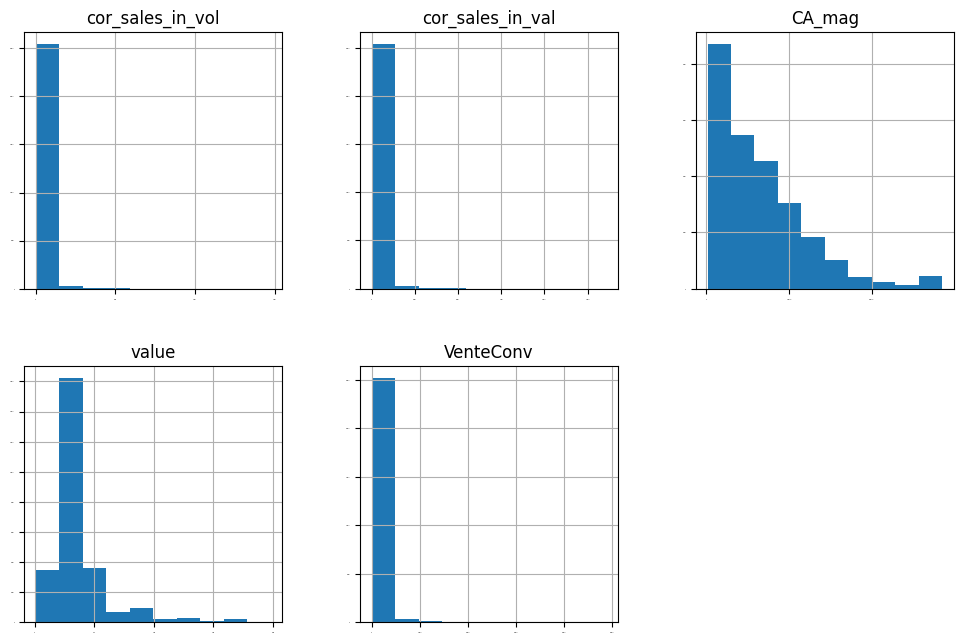

In [19]:
# histograms
dataset.hist(sharex=False, sharey=False, layout=(3,3), xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()